*Warning: this is just an example to understand how k-NN works*

In [1]:
from io import StringIO
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import urllib

## Import the iris dataset

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data_str = StringIO(urllib.request.urlopen(url).read().decode())

def iris_name_to_int(name):
    if name == b'Iris-setosa': return 0
    if name == b'Iris-versicolor': return 1
    return 2
    
dataset = np.loadtxt(data_str, delimiter=',', usecols=(2,3,4), converters={4: iris_name_to_int})
np.random.shuffle(dataset)
train_X = np.array(dataset[:100,[0,1]])
train_Y = np.array(dataset[:100,2])
test_X = np.array(dataset[100:,[0,1]])
test_Y = np.array(dataset[100:,2])

The dataset is organized this way :

X = **\[ \[ Petal length, Petal width \] \]** with shape **(n_instance, n_feature)**

Y = **\[ Iris type name \]** with shape **(n_instance)** where :

    0 = setosa
    1 = versicolor
    2 = virginica

I only choose 2 features for the sake of simplicity.

## Plot the data

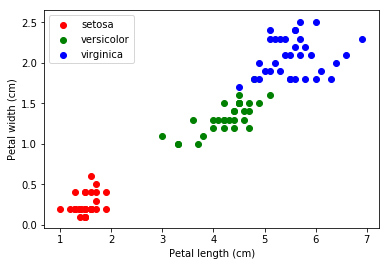

In [3]:
seto = plt.scatter(train_X[np.where(train_Y == 0),0], train_X[np.where(train_Y == 0),1], marker='o', color='r')
vers = plt.scatter(train_X[np.where(train_Y == 1),0], train_X[np.where(train_Y == 1),1], marker='o', color='g')
virg = plt.scatter(train_X[np.where(train_Y == 2),0], train_X[np.where(train_Y == 2),1], marker='o', color='b')
plt.legend((seto, vers, virg), ('setosa', 'versicolor', 'virginica'))
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()

## Distance between two data instances

<center>In a 2D space, the [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between two points is equal to:</center>

$$\sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2}$$

In [4]:
def distance(a, b):
    dx = pow(a[0] - b[0], 2)
    dy = pow(a[1] - b[1], 2)
    
    return math.sqrt(dx + dy)

print(distance([1,1], [3,3])) # test

2.8284271247461903


## Find nearest neighbors

In [5]:
def find_k_neighbors(instance, k):
    distances = [ (x, distance(instance, train_X[x])) for x in range(len(train_X)) ]
    np_distances = np.array(distances, dtype=[('index', int), ('distance', float)])
    
    return np.sort(np_distances, order='distance')[:k]

print(find_k_neighbors([6, 2], 3)) # test

[(28, 0.14142136) (98, 0.14142136) (39, 0.2       )]


## Select majority

In [6]:
def majority(neighbors):
    iris_types = [ train_Y[idx] for (idx, dist) in neighbors ]
    (values,counts) = np.unique(iris_types,return_counts=True)
    idx = np.argmax(counts)
    
    return values[idx]

print(majority([(50, 1), (1, 2), (70, 3), (75, 3)])) # test

0.0


## Test

In [7]:
def predict(instance, k):
    return majority(find_k_neighbors(instance, k))

In [8]:
def test(k):
    correct = 0
    for x in range(len(test_X)):
        if predict(test_X[x], k) == test_Y[x]:
            correct += 1
    accuracy = (correct/float(len(test_X))) * 100.0
    
    print('Accuracy: ' + str(accuracy) + '%')
    print('Correct: ' + str(correct) + '/' + str(len(test_X)))

In [9]:
k = 4
test(k)

Accuracy: 96.0%
Correct: 48/50


## Decision boundaries

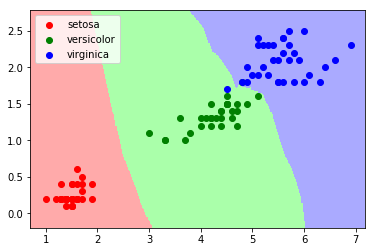

In [10]:
cmap_boundaries = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

step_size = .02
x_min, x_max = train_X[:, 0].min() - 0.3, train_X[:, 0].max() + 0.3
y_min, y_max = train_X[:, 1].min() - 0.3, train_X[:, 1].max() + 0.3
x_steps, y_steps = np.meshgrid(np.arange(x_min, x_max, step_size),
                     np.arange(y_min, y_max, step_size))

Z = np.array([predict(step, k) for step in np.c_[x_steps.ravel(), y_steps.ravel()]])

Z = Z.reshape(x_steps.shape)
plt.figure()
plt.pcolormesh(x_steps, y_steps, Z, cmap=cmap_boundaries)

seto = plt.scatter(train_X[np.where(train_Y == 0),0], train_X[np.where(train_Y == 0),1], marker='o', color='r')
vers = plt.scatter(train_X[np.where(train_Y == 1),0], train_X[np.where(train_Y == 1),1], marker='o', color='g')
virg = plt.scatter(train_X[np.where(train_Y == 2),0], train_X[np.where(train_Y == 2),1], marker='o', color='b')
plt.legend((seto, vers, virg), ('setosa', 'versicolor', 'virginica'))
plt.xlim(x_steps.min(), x_steps.max())
plt.ylim(y_steps.min(), y_steps.max())
plt.show()